In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 2: Image resizing (Upsampling / Downsampling)

Note that in digital image processing upsampling or downsampling simply means resizing your image. When you upsample you zoom the image and vice-versa. We will use two different spatial domain approach (interpolation method) to achieve this:
1. Nearest Neighbour interpolation/ Pixel replication method [Wiki](https://en.wikipedia.org/wiki/Nearest-neighbor_interpolation)
2. Bilinear interpolation method [Wiki](https://en.wikipedia.org/wiki/Bilinear_interpolation)

In this assignment we will will not analyse the frequency domain signal.

In [5]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-r70pwm0c
  Created wheel for ee604-plugins: filename=ee604_plugins-0.1.4-cp36-none-any.whl size=2305 sha256=2702590be0baf4f8d9db2e78a5d6b78c4104e961e457bfd09357dc20aed662b0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lb20bfsc/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-r70pwm0c


In [6]:
# Importing required libraries

import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow

download_dataset(assignment_no=1, task_no=2) # download data for this assignment

Download Complete!


In [7]:
data = cv2.imread("data/parallel_lines.jpg")

In [8]:
def resize_nn(img, k=2):
    '''
    Write a program to resample the given image by a factor 'k' using Nearest Neighbour method
    
    Inputs:
    + img - Original image
    + k - resampling factor, therefore if input image size is 300x300 
        - and k=0.5 ==> output image size = 150x150
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    m,n,p = img.shape
    out_m,out_n = int(k*m), int(k*n)

    out_img = np.zeros((out_m,out_n,p), dtype=np.uint8)

    for i in range(out_m):
      for j in range(out_n):
        new_centre_row, new_centre_column = int((i+0.5)/k), int((j+0.5)/k)
        out_img[i][j] = img[new_centre_row][new_centre_column]
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [15]:
def resize_bilinear(img, k=2):
    '''
    Write a program to resample the given image by a factor 'k' using Bilinear interpolation method.
    
    Inputs:
    + img - Original image
    + k - resampling factor
    
    Ouputs:
    + out_img - numpy array (of dtype np.uint8) containing the output image.
    
    Allowed external package:
    + You are not allowed to use any cv2 resize module or any other external package. 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    m,n,p = img.shape
    out_m, out_n = int(k*m), int(k*n)

    out_img = np.zeros((out_m,out_n,p), dtype=np.uint8)

    row_ratio = (m-1)/(out_m-1)
    column_ratio = (n-1)/(out_n-1)

    for i in range(out_m):
      for j in range(out_n):
        x1 = math.floor(column_ratio * j)
        y1 = math.floor(row_ratio * i)
        x2 = math.ceil(column_ratio * j)
        y2 = math.ceil(row_ratio * i)

        column_weight = (column_ratio * j) - x1
        row_weight = (row_ratio * i) - y1

        x = img[y1, x1]
        y = img[y1, x2]
        w = img[y2, x1]
        z = img[y2, x2]
        
        A_interpolated_in_xy = x*(1-column_weight) + y*column_weight
        B_interpolated_in_wz = w*(1-column_weight) + z*column_weight

        out_img[i][j] = A_interpolated_in_xy*(1-row_weight) + B_interpolated_in_wz*row_weight

        
    #############################
    # End your code here ########
    #############################    
    
    return out_img

#### Sample the given image for following values of k = 0.5, 0.51, 0.99, 2, 2.1 using both the methods. 
Plot the images using `cv2_imshow` and write your observation on the differences with an intuitive explanation.


Resampling the given image by a factor 0.5 using Nearest Neighbour method:


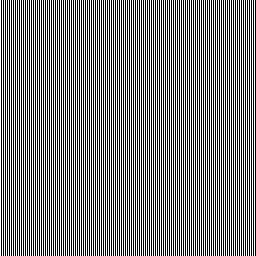

Resampling the given image by a factor 0.5 using Bilinear interpolation method


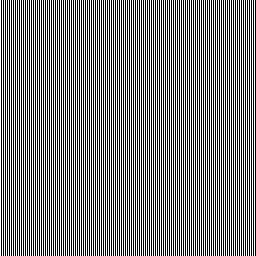

Resampling the given image by a factor 0.51 using Nearest Neighbour method:


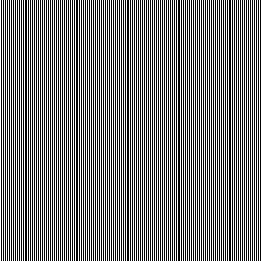

Resampling the given image by a factor 0.51 using Bilinear interpolation method


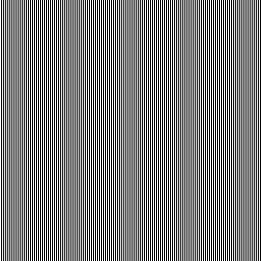

Resampling the given image by a factor 0.99 using Nearest Neighbour method:


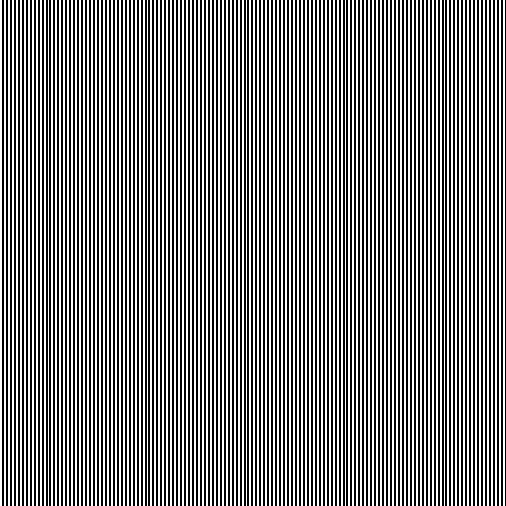

Resampling the given image by a factor 0.99 using Bilinear interpolation method


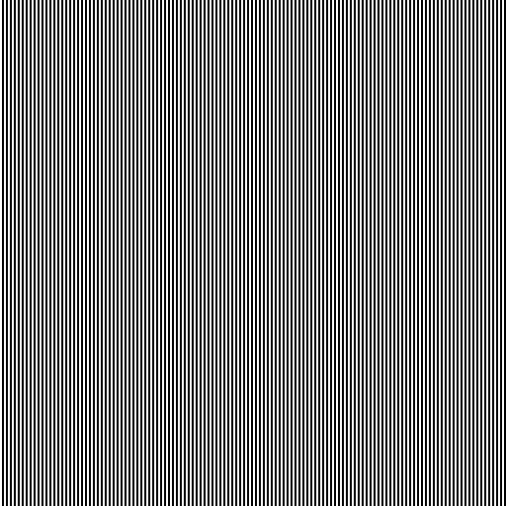

Resampling the given image by a factor 2 using Nearest Neighbour method:


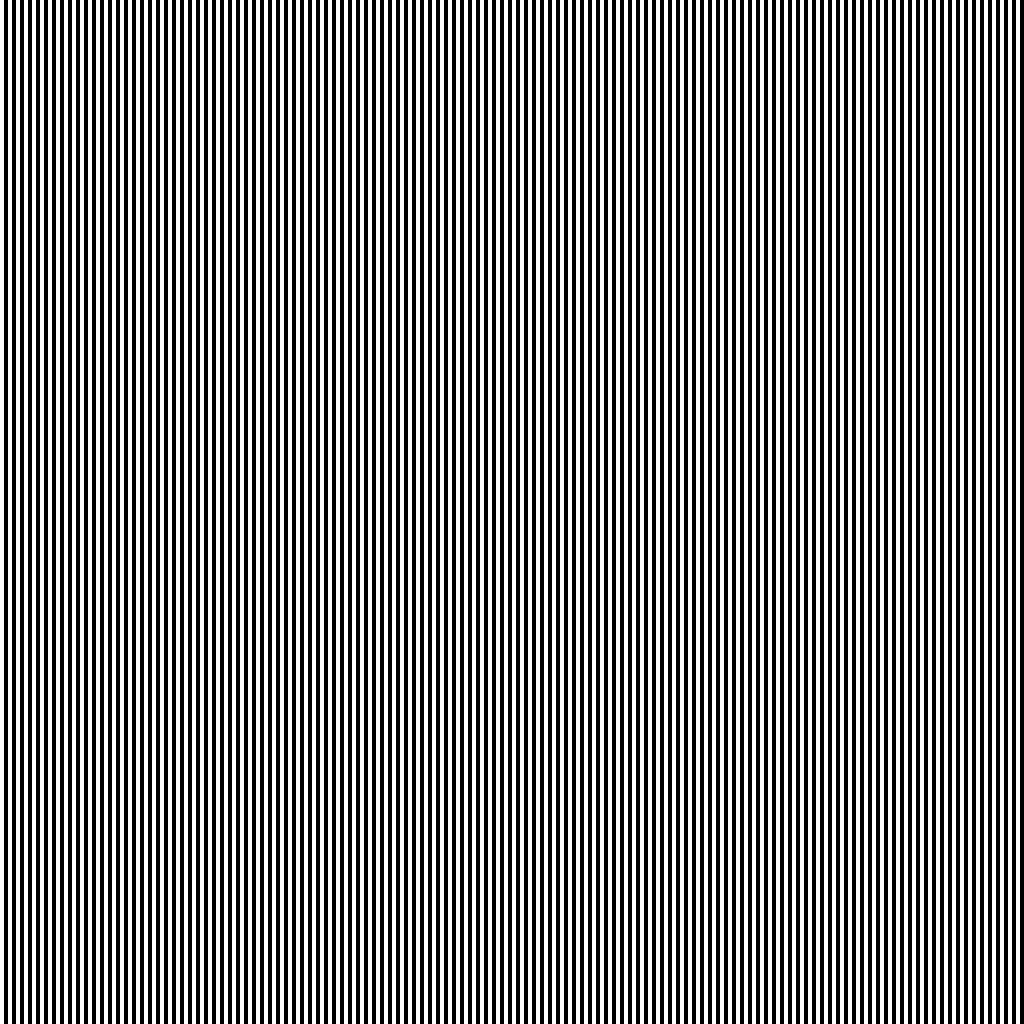

Resampling the given image by a factor 2 using Bilinear interpolation method


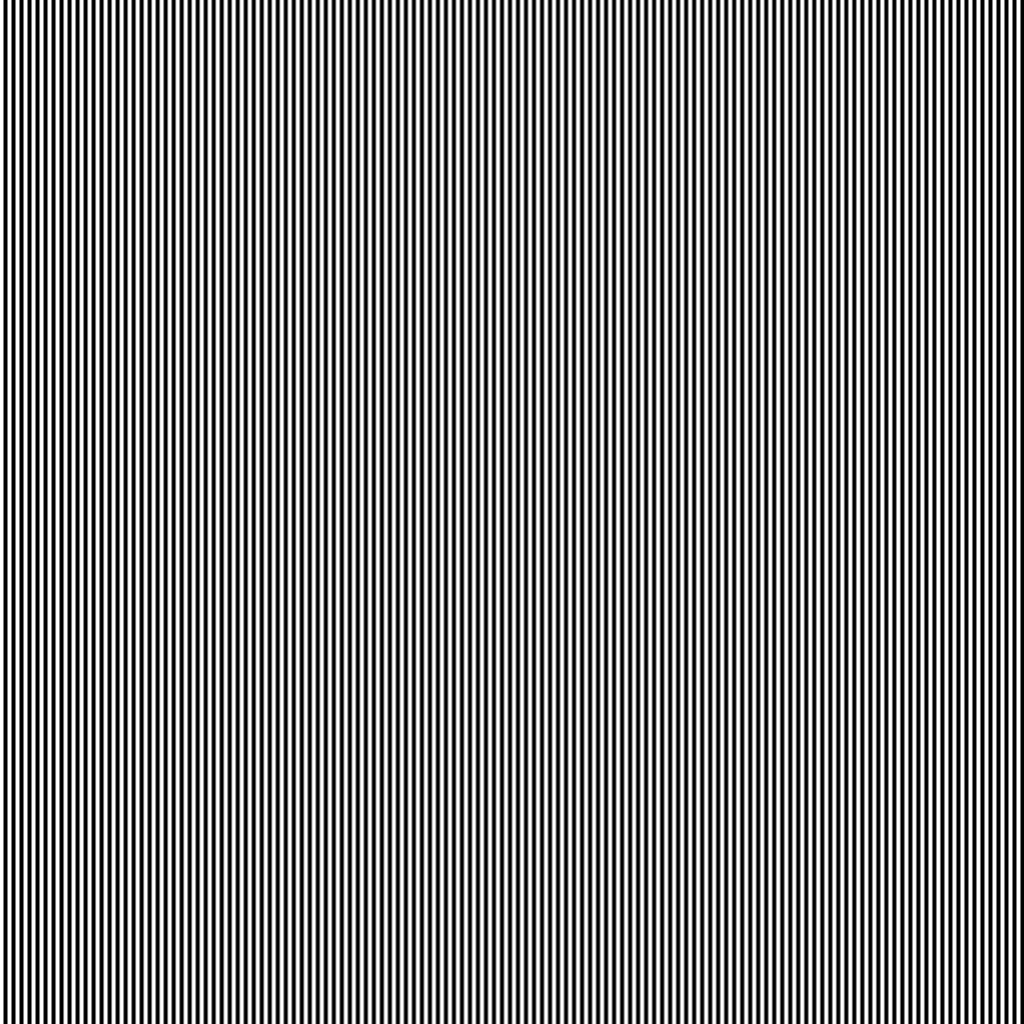

Resampling the given image by a factor 2.1 using Nearest Neighbour method:


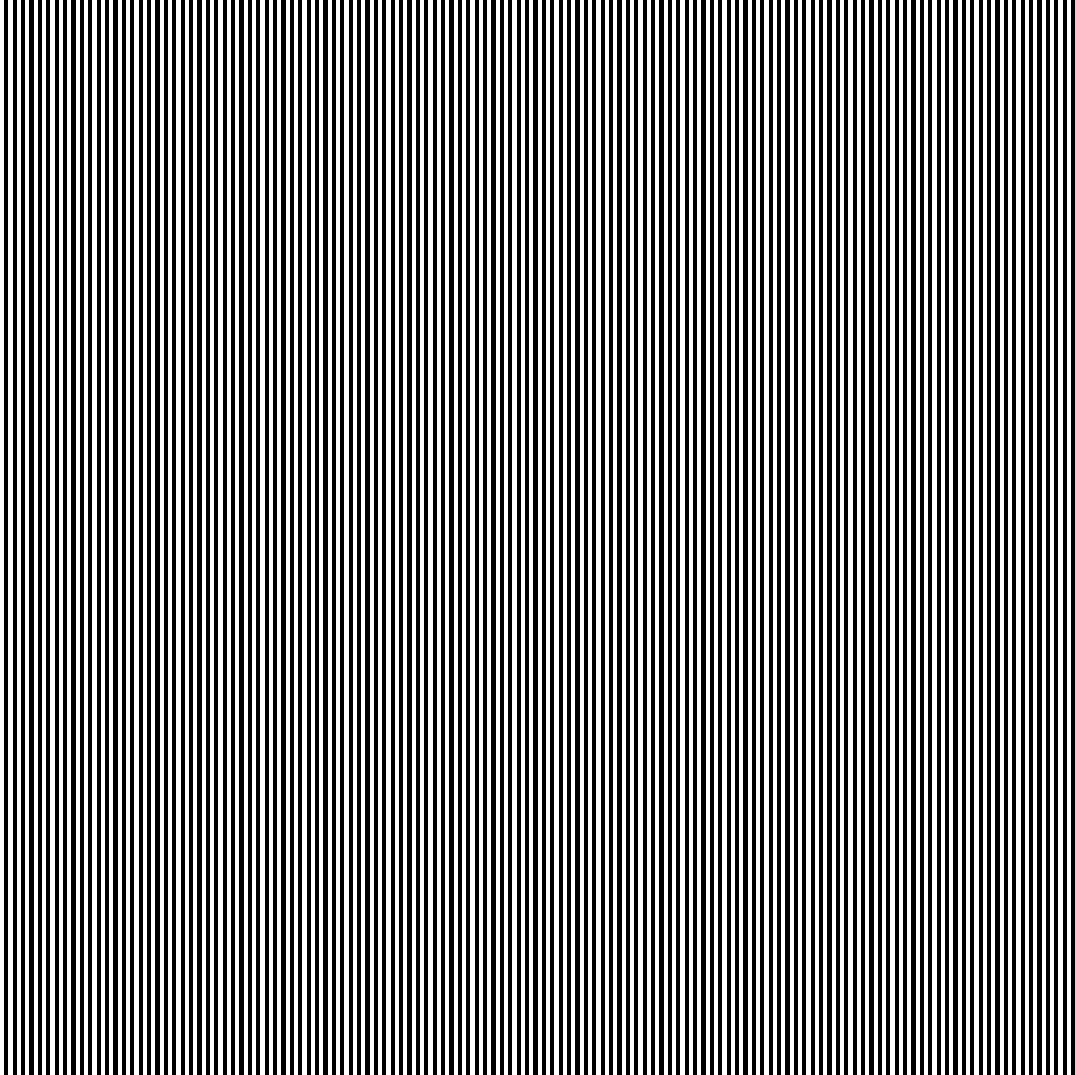

Resampling the given image by a factor 2.1 using Bilinear interpolation method


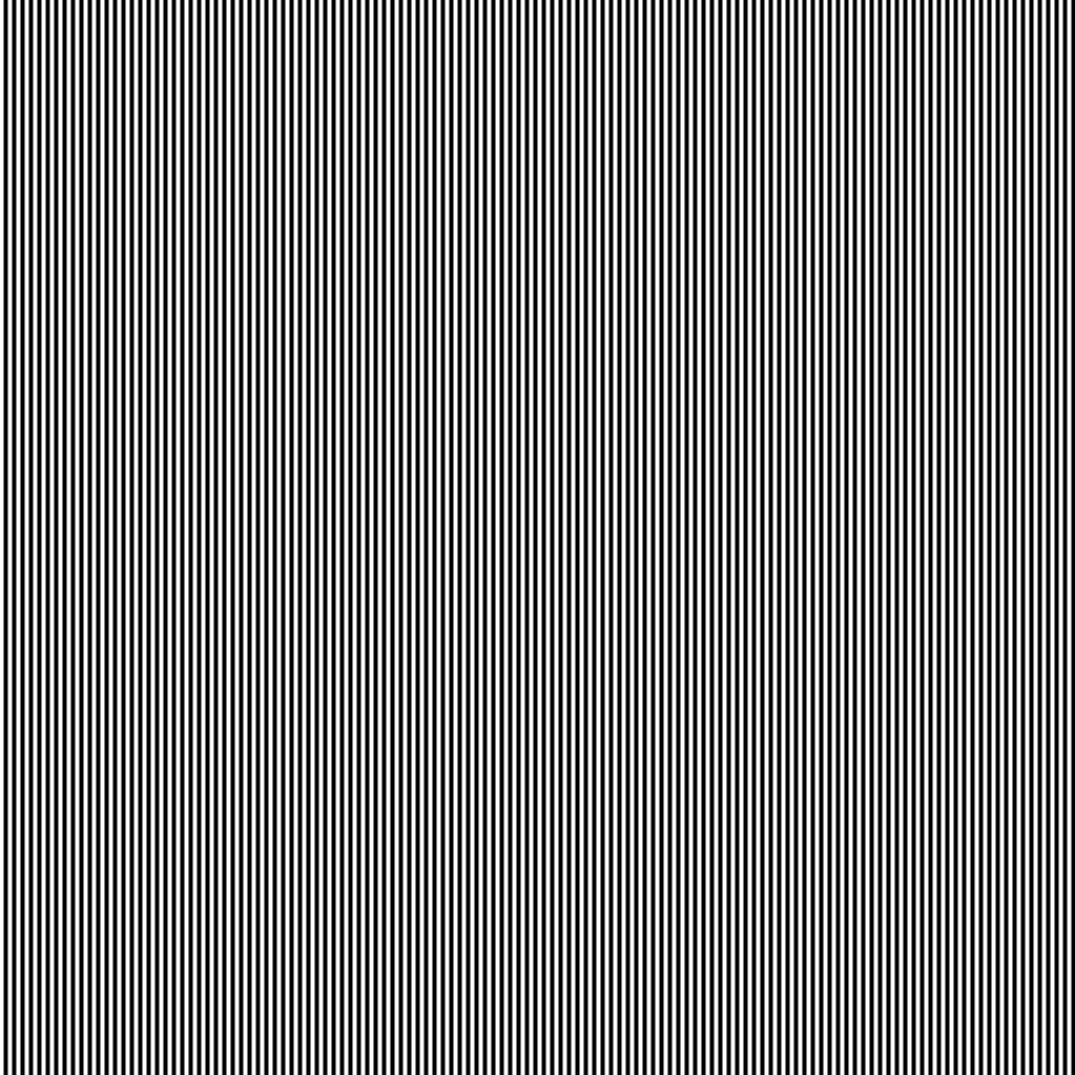

In [16]:
orig_img = np.copy(data) # Resample this image

#############################
# Start your code from here #
#############################

for i in ([0.5, 0.51, 0.99, 2, 2.1]):
  
  print("Resampling the given image by a factor",i,"using Nearest Neighbour method:")
  cv2_imshow(resize_nn(orig_img, i))
  
  print("Resampling the given image by a factor",i,"using Bilinear interpolation method")
  cv2_imshow(resize_bilinear(orig_img, i))

#############################
# End your code here ########
#############################  

In [ ]:
your_observation = """
As we can see that in Nearest Neighbour Method, for k=0.5 and k=2, it is giving good result, but for k=0.51, 0.99 and 2.1 it has some 
overlapping lines on the edges. On the other hand, Bilinear Interpolation is also good for k=0.5 and k=2, but for k=0.51, 0.99 and 2.1 it is showing
a more gradual change from the original image on the edges. Also, more clearer(lines appear well distinct) image is produced in nearest neighbour than 
Bilinear interpolation. 

"""

print(your_observation)


Replace this text with your observations.

